In [1]:
# txt文件名命名规则:辐射源编号(GRS 1915+105)+'_'+模型编号(Model1A)+'_'+其他

In [2]:
%reset -f
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib import gridspec
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from matplotlib.ticker import NullFormatter
from IPython.display import set_matplotlib_formats
#User-defined package
import general as g

%matplotlib inline
#有了%matplotlib inline 就可以省掉plt.show()了
set_matplotlib_formats('svg')
#svg: Scalable Vector Graphics

/var/folders/p4/k2mn1bys7kj2_sc0401cf08h0000gn/T/ipykernel_21070/1952221396.py:16: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [25]:
# plot for only one file and save as a pdf file
# you see that there are some default parameters in this function,you can change them according to your only plot.
# prop: 光谱各个成分中最小成分的显示比例(按y值)
# yticks and yticklabels are dependent on models used, so they don't show up here.
def plot_ra_single_file(infile,x_min=3.0,x_max=55.0,xticks=[5.0,10.0,20.0,50.0],xticklabels=[5,10,20,50]):
    # please check the energy scale(~keV):
    # 对文件进行切分（不同图型，不同观测仪器）
    g.rewrite_ipl(infile)
        # for example: we have 2 instruments(XIS and HXD) and 1 plot types(ratio),so it will create 1*2 = 2 files.        
    num_ins = int(g.rewrite_ipl(infile))
        # num_ins:number of instruments; g.rewrite_ipl will return the number of files which it creates. 
    print(num_ins)
    #colors for different instrument in ratio plot:
    if num_ins == 2:
        colors = ['blue', '#FF00FF'] 
    elif num_ins == 3:
        colors = ['blue', '#FF00FF', 'green']
    else:
        pass
    
    fig = plt.figure()
    ax = plt.subplot()

    for l in range(num_ins):
        datafile = f"temp-{l}.txt"
        data = np.genfromtxt(datafile, unpack=True)
        x = data[0]
        y = data[2]
        xerr = data[1].T  
        yerr = data[3].T
        ax.errorbar(x=data[0], y=data[2], xerr=data[1], yerr=data[3], marker='o', fmt='o', color='black',ms=0.0, 
                lw=0.5, ecolor=colors[l], mec='black',mew=0.5)

    #Logarithmic axis
    ax.set_xscale("log")

    #adding hline
    ax.axhline(y=1, color='black', ls='-', lw=1)
    ## ls:linestyle, such as{'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
    ## lw:linewith

    # the limit of axis
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(0.9,1.1)

    # text
    ax.set_ylabel(r'Ratio', fontsize=12)
    ax.set_xlabel('Energy (keV)', fontsize = 12) 

    #ticks 
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.set_yticks([0.9,0.95,1.00,1.05,1.1])
    ax.set_yticklabels([0.9,0.95,1.00,1.05,1.1])

    ax.tick_params(axis='y',which='major', labelsize=10, direction='in', right=True, length=7, width=0.8)
    ax.tick_params(axis='y',which='minor', labelsize=10, direction='in', right=True, length=5, width=0.8)
    ax.tick_params(axis='x',which='major', labelsize=10, direction='in', top=True, length=7, width=0.8)
    ax.tick_params(axis='x',which='minor', labelsize=10, direction='in', top=True,length=5, width=0.8)

    ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    file_name = infile.split('.')[0] + '.pdf'
    fig.savefig(file_name)
    
    #delete temp files
    temp_file = g.rewrite_ipl(infile)
    for n in range(temp_file):
        os.remove(f"temp-{n}.txt")
        if os.path.exists(f"temp-{n}.txt-e") is True:
            os.remove(f"temp-{n}.txt-e")
        
    return ax

2


/var/folders/p4/k2mn1bys7kj2_sc0401cf08h0000gn/T/ipykernel_21070/600663194.py:31: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(x=data[0], y=data[2], xerr=data[1], yerr=data[3], marker='o', fmt='o', color='black',ms=0.0,
/var/folders/p4/k2mn1bys7kj2_sc0401cf08h0000gn/T/ipykernel_21070/600663194.py:31: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(x=data[0], y=data[2], xerr=data[1], yerr=data[3], marker='o', fmt='o', color='black',ms=0.0,


2
2


/var/folders/p4/k2mn1bys7kj2_sc0401cf08h0000gn/T/ipykernel_21070/600663194.py:31: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(x=data[0], y=data[2], xerr=data[1], yerr=data[3], marker='o', fmt='o', color='black',ms=0.0,


<AxesSubplot:xlabel='Energy (keV)', ylabel='Ratio'>

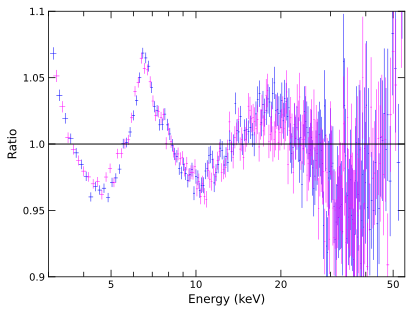

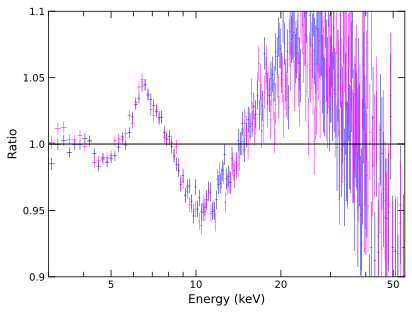

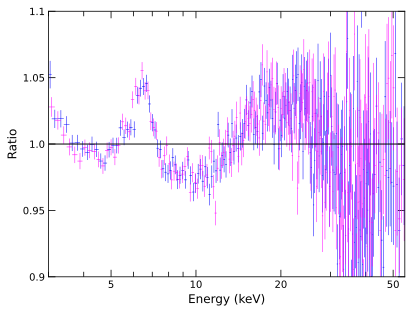

In [26]:
plot_ra_single_file('grs1739_nthcomp_pl-ra.txt')
plot_ra_single_file('exo1846_diskbb+nthcomp_pl-ra.txt')
plot_ra_single_file('gs1354_nthcomp_pl-ra.txt')